# Material Deformation - Using QUBO


In [1]:
import sys as sys
import pandas as pd
import numpy as np
import pandas as pd
import random, math
import copy
import numba
from numba import jit
import tqdm
from time import time
from tqdm import tqdm
from matplotlib import pyplot as plt
df = pd.read_csv(r'C:\Users\Bhargav\BMW\Set C\128x128_-45%-9439.csv',header=None)
#df.as_matrix()



In [2]:
#np.set_printoptions(threshold=sys.maxsize)

In [3]:
X1 = df.values

In [4]:
X1

array([[ 0., 31.,  0., ..., 32., 32.,  0.],
       [27.,  0., 22., ...,  0.,  0.,  0.],
       [ 0.,  0., 14., ...,  0.,  0., 15.],
       ...,
       [ 0.,  0., 24., ..., 30.,  0.,  0.],
       [25.,  0.,  0., ...,  0.,  0., 22.],
       [ 0.,  0., 24., ...,  0.,  0.,  0.]])

In [5]:

X1.shape

(128, 128)

In [6]:
X = np.true_divide(X1 ,  2000)

In [7]:
X

array([[0.    , 0.0155, 0.    , ..., 0.016 , 0.016 , 0.    ],
       [0.0135, 0.    , 0.011 , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.007 , ..., 0.    , 0.    , 0.0075],
       ...,
       [0.    , 0.    , 0.012 , ..., 0.015 , 0.    , 0.    ],
       [0.0125, 0.    , 0.    , ..., 0.    , 0.    , 0.011 ],
       [0.    , 0.    , 0.012 , ..., 0.    , 0.    , 0.    ]])

0.45001220703125

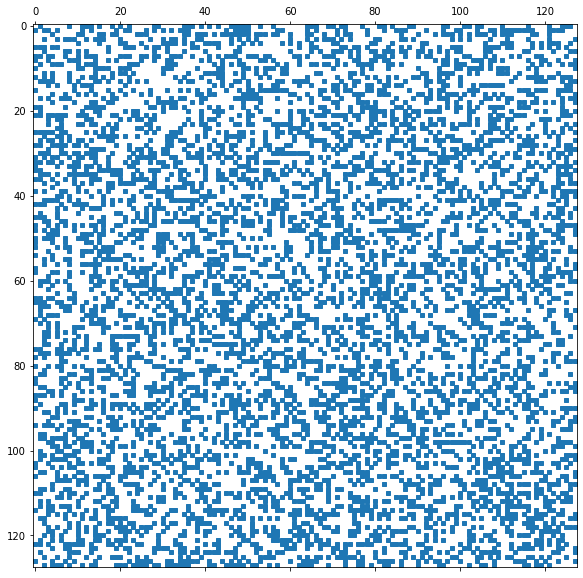

In [8]:
from numpy import count_nonzero
plt.spy(X, precision = 0.01, markersize = 4)
# betterspy.write_png("out.png", X , border_width=2, border_color="red", colormap="viridis")
# betterspy 1138.mtx [Matrix.png]
# betterspy.show(X)
# betterspy.write_png("X matrix", X)
F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*2.5, Size[1]*2.5, forward=True)

# plt.colorbar()
# plt.show()

sparsity = ( count_nonzero(X) / float(X.size) )
sparsity


In [9]:
df1 = pd.read_csv(r'C:\Users\Bhargav\BMW\Set C\128x1_-45%-9439.csv',header=None)
#df.as_matrix()

In [10]:


Y1=df1.values

In [11]:
Y1.shape

(128, 1)

In [12]:
Y = np.true_divide(Y1 , 2000)

In [13]:
Y

array([[0.    ],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.015 ],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.017 ],
       [0.    ],
       [0.    ],
       [0.01  ],
       [0.0115],
       [0.    ],
       [0.01  ],
       [0.    ],
       [0.0055],
       [0.0115],
       [0.0135],
       [0.0125],
       [0.012 ],
       [0.0085],
       [0.015 ],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.0075],
       [0.    ],
       [0.0125],
       [0.013 ],
       [0.0125],
       [0.012 ],
       [0.0105],
       [0.    ],
       [0.    ],
       [0.013 ],
       [0.016 ],
       [0.    ],
       [0.    ],
       [0.012 ],
       [0.0135],
       [0.    ],
       [0.    ],
       [0.0135],
       [0.    ],
       [0.012 ],
       [0.    ],
       [0.0195],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.0095],
       [0.012 ],
       [0.011 

In [14]:
Dimension = 128
bits = 13     
#b = HDimension = 16
#qubits = 2
A = X
b = Y
m = 6

In [15]:
t0 = time()

In [16]:
QM = np.zeros(((bits+1)*Dimension, (bits+1)*Dimension), dtype=np.float64)
QM

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
QM.shape

(1792, 1792)

In [18]:
for k in range(Dimension):
    for i in range(Dimension):
        for l in range(-8,5):
            cef1 = pow(2,2*l)* pow (A[k][i],2)-pow(2,l+1)* A[k][i]*b[k]
            po1 = 14*i + l + 8
            QM[po1][po1] = QM[po1][po1] + cef1
            #################################################
            cef2 = -pow(2,(l+m+2))* pow (A[k][i],2)
            po3 = 14*i + 1  # q_i-
            po4 = 14*i + l + 8 #q_i,l +
            QM[po3][po4] = QM[po3][po4] + cef2
            
            
#QM #okkkkkkkkkkkkkkkkkkkkkk

In [19]:

# No l loop +13?????

# 2nd for loop
for k in range(Dimension):
    for i in range(Dimension):
            cef1 = pow(2,(2*m+2))* pow (A[k][i],2)
            cef2= pow(2,m+2)* A[k][i]*b[k]
            po1 = 14*i  
            po2 = 14*i + 1
            QM[po2][po2] = QM[po2][po2] + cef1 #q-
            QM[po1][po1] = QM[po1][po1] + cef2  # q+
            
#QM #okkkkkkkkkkkkkkkkkk

In [20]:
# 3rd for loop
@jit(nopython=True)

def faster0(QM): 
    for k in range(Dimension):
        for i in range(Dimension):
            for l1 in range(-8,5):
                for l2 in range(l1+1,5):
                    qcef = pow(2, l1+l2+1)*pow(A[k][i],2)
                    po1 = 14*i + l1 + 8
                    po2 = 14*i + l2 + 8
                    QM[po1][po2] = QM[po1][po2] + qcef
    return QM

QM = faster0(QM)  
#QM
######### okkkkkk 

In [21]:
## 4th for loop
@jit(nopython=True)

def faster(QM):  
    for k in range(Dimension):
        for i in range(Dimension-1):
            for j in range(i+1,Dimension):
                for l1 in range(-8,5):
                    for l2 in range(-8,5):
                        qcef = pow(2, l1+l2+1) * A[k][i] * A[k][j]
                        po1 = 14*i + l1 + 8
                        po2 = 14*j + l2 + 8
                        QM[po1][po2] = QM[po1][po2] + qcef
    return QM

QM = faster(QM) 
#QM
#### okkkkkkkkkkkkkkkkkkkkk

In [22]:
###5th loop
@jit(nopython=True)

def faster1(QM): 
    for k in range(Dimension):
        for i in range(Dimension-1):
            for j in range(i+1,Dimension):
                qcef = pow(2, m+3) * A[k][i]*A[k][j]
                po1 = 14*i + 1
                po2 = 14*j + 1
                QM[po1][po2] = QM[po1][po2] + qcef

                for l in range(-8,5):
                    qcef1 = -pow(2, l+m+2) * A[k][i] * A[k][j]
                    po1 = 14*i + 1  # q_i -
                    po2 = 14*j + l + 8 # q_j,l +
                    QM[po1][po2] = QM[po1][po2] + qcef1

                    po3 = 14*i + l + 8  #q_i,l+
                    po4 = 14*j + 1  # q_j-
                    QM[po3][po4] = QM[po3][po4] + qcef1
    return QM
                
QM = faster1(QM)
#QM
###okkkkkkkkkkkkk

In [23]:
QM

array([[ 1.23369050e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-9.66325000e-03,  1.58303287e+02, -3.86530000e-02, ...,
        -8.38912000e+00, -1.67782400e+01,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.48242371e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         5.33760000e-01,  2.44793600e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  2.29148800e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [24]:
time_taken_qubogen=time()-t0
time_taken_qubogen

8.930358648300171

In [25]:
from dwave.system import LeapHybridSampler

In [26]:
sampler = LeapHybridSampler(Profile='Max1')

In [27]:
# %%capture captured
# # Print Python code for the run in D-Wave quantum processing unit
# print("\n\nfrom dwave.system import DWaveSampler, EmbeddingComposite")
# print("sampler_auto = EmbeddingComposite(DWaveSampler(solver={'qpu': True}))\n")
# #from dwave.system import DWaveSampler, EmbeddingComposite
# #sampler_auto = EmbeddingComposite(DWaveSampler(solver={'qpu': True}))

# print("linear = {", end = "")
# for i in range((bits+1)*Dimension-1): 
#     linear = i + 1
#     print ("('q",linear,"','q",linear,"'):",format(QM[i][i]),sep='', end = ", ")
# print ("('q",(bits+1)*Dimension,"','q",(bits+1)*Dimension,"'):",format(QM[(bits+1)*Dimension-1][(bits+1)*Dimension-1]),"}", sep='')

# print("\nquadratic = {", end = "")
# for i in range((bits+1)*Dimension-1):
#     for j in range(i+1,(bits+1)*Dimension):
#         if QM[i][j] != 0:
#             qdrt1 = i + 1
#             qdrt2 = j + 1
#             if i == (bits+1)*Dimension-2 and j == (bits+1)*Dimension-1:
#                 print ("('q",qdrt1,"','q",qdrt2,"'):",format(QM[i][j]), "}", sep='')
#             else:
#                 print ("('q",qdrt1,"','q",qdrt2,"'):",format(QM[i][j]), sep ='', end = ", ")

# print("\nQ = dict(linear)")
# print("Q.update(quadratic)\n")

# qa_iter = 1000
# #print("sampleset = sampler_auto.sample_qubo(Q, num_reads=",qa_iter,")", sep = "")
# #print("print(sampleset)")

# #Q = dict(linear)
# #Q.update(quadratic)
# print("sampleset = sampler.sample_qubo(Q)")
# print("print(sampleset)")
# #sampleset = sampler_auto.sample_qubo(Q, num_reads=1000)
# #print(sampleset)


In [27]:
f = open("code128_16sp3%.py", "a")
# Print Python code for the run in D-Wave quantum processing unit
print("\n\nfrom dwave.system import DWaveSampler, EmbeddingComposite", file=f)
print("#sampler_auto = EmbeddingComposite(DWaveSampler(solver={'qpu': True}))\n", file=f)
print("linear = {", end = "", file=f)

for i in range((bits+1)*Dimension-1):
    linear = i + 1
    print ("('q",linear,"','q",linear,"'):",format(QM[i][i]),sep='', end = ", ", file=f)
print ("('q",(bits+1)*Dimension,"','q",(bits+1)*Dimension,"'):",format(QM[((bits+1)*Dimension)-1][((bits+1)*Dimension)-1]),"}", sep='', file=f)
print("\nquadratic = {", end = "", file=f)
for i in range((bits+1)*Dimension-1):
    for j in range(i+1,(bits+1)*Dimension):
        if QM[i][j] != 0:
            qdrt1 = i + 1
            qdrt2 = j + 1
            if i == (bits+1)*Dimension-2 and j == (bits+1)*Dimension-1:
                print ("('q",qdrt1,"','q",qdrt2,"'):",format(QM[i][j]), "}", sep='', file=f)
            else:
                print ("('q",qdrt1,"','q",qdrt2,"'):",format(QM[i][j]), sep ='', end = ", ", file=f)
print("\nQ = dict(linear)", file=f)
print("Q.update(quadratic)\n", file=f)
qa_iter = 1000
print("sampleset = sampler.sample_qubo(Q)", sep = "", file=f)
print("print(sampleset)", file=f)
f.close()





In [28]:
t1 = time()

In [30]:
f = open("code128_16sp3%.py", "r")
exec(f.read())
f.close()

  q1 q10 q100 q1000 q1001 q1002 q1003 q1004 ... q999         energy num_oc.
0  0   1    1     1     1     1     1     1 ...    1 -442937.170746       1
['BINARY', 1 rows, 1 samples, 1792 variables]


In [31]:
time_taken_quboans=time()-t1
time_taken_quboans

91.89469790458679

In [ ]:
#str=captured.stdout

In [ ]:
#exec(str)

## Sample code for testing the zip method

In [46]:
hi_1 = [ 1, 0 , 1 , 1 , 1 , 1, 0 , 0, 1 ]
hello_1 =[1,5,  3,  6,  9,  2, 4, 7,   8]

hi_1_sorted = [x for _,x in sorted(zip(hello_1,hi_1))]
print(hi_1_sorted)     # 1,2,3,4,5,6,7,8,9 <-> 1,1,1,0,0,1,0,1,1

[1, 1, 1, 0, 0, 1, 0, 1, 1]


# Sorting record array with respect to variables array.

In [32]:
#qubit_values
sampleset.record

rec.array([([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 

In [36]:
sampleset.variables

Variables(['q1', 'q10', 'q100', 'q1000', 'q1001', 'q1002', 'q1003', 'q1004', 'q1005', 'q1006', 'q1007', 'q1008', 'q1009', 'q101', 'q1010', 'q1011', 'q1012', 'q1013', 'q1014', 'q1015', 'q1016', 'q1017', 'q1018', 'q1019', 'q102', 'q1020', 'q1021', 'q1022', 'q1023', 'q1024', 'q1025', 'q1026', 'q1027', 'q1028', 'q1029', 'q103', 'q1030', 'q1031', 'q1032', 'q1033', 'q1034', 'q1035', 'q1036', 'q1037', 'q1038', 'q1039', 'q104', 'q1040', 'q1041', 'q1042', 'q1043', 'q1044', 'q1045', 'q1046', 'q1047', 'q1048', 'q1049', 'q105', 'q1050', 'q1051', 'q1052', 'q1053', 'q1054', 'q1055', 'q1056', 'q1057', 'q1058', 'q1059', 'q106', 'q1060', 'q1061', 'q1062', 'q1063', 'q1064', 'q1065', 'q1066', 'q1067', 'q1068', 'q1069', 'q107', 'q1070', 'q1071', 'q1072', 'q1073', 'q1074', 'q1075', 'q1076', 'q1077', 'q1078', 'q1079', 'q108', 'q1080', 'q1081', 'q1082', 'q1083', 'q1084', 'q1085', 'q1086', 'q1087', 'q1088', 'q1089', 'q109', 'q1090', 'q1091', 'q1092', 'q1093', 'q1094', 'q1095', 'q1096', 'q1097', 'q1098', 'q109

 ### Cleanup of variables array done in MS-Word. Following which we obtain the following array. 
 ### Note: hello array = Variables array

In [34]:
hello=np.array([1, 10, 100, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 101, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 102, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 103, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 104, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 105, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 106, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 107, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 108, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 109, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 11, 110, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 111, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 112, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 113, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 114, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 115, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 116, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 117, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 118, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 119, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 12, 120, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 121, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 122, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 123, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 124, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 125, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 126, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 127, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 128, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 129, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 13, 130, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 131, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 132, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 133, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 134, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 135, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 136, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 137, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 138, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 139, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 14, 140, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 141, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 142, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 143, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 144, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 145, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 146, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 147, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 148, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 149, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 15, 150, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 151, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 152, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 153, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 154, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 155, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 156, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 157, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 158, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 159, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 16, 160, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 161, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 162, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 163, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 164, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 165, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 166, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 167, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 168, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 169, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 17, 170, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 171, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 172, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 173, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 174, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 175, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 176, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 177, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 178, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 179, 1790, 1791, 1792, 18, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 19, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 2, 20, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 21, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 23, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 24, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 25, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 26, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 27, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 28, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 29, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 3, 30, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 31, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 32, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 33, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 34, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 35, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 36, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 37, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 38, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 39, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 4, 40, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 41, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 42, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 43, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 44, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 45, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 46, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 47, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 48, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 49, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 5, 50, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 51, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 52, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 53, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 54, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 55, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 56, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 57, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 58, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 59, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 6, 60, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 61, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 62, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 63, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 64, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 65, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 66, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 67, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 68, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 69, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 7, 70, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 71, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 72, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 73, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 74, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 75, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 76, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 77, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 78, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 79, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 8, 80, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 81, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 82, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 83, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 84, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 85, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 86, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 87, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 88, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 89, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 9, 90, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 91, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 92, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 93, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 94, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 95, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 96, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 97, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 98, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 99, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999])
len(hello)


1792

### Note: hi array = record array

In [33]:

hi=np.array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1])

### Finally sorting done as desired

In [35]:
hi_sorted = [x for _,x in sorted(zip(hello,hi))]
print(hi_sorted)  

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

# Converting into real number (x_i) from the qubits q_0,q_1,....,q_8191= Penguin(= hi_sorted) using equation (11) in https://arxiv.org/pdf/2106.10819.pdf

### Note : In Penguin, some are q+ and some are q-. The following code gives the indices of q+ and q- in Penguin.
### Namely, h gives the indices of q+ AND q gives the indices of q-


In [42]:
# #x=[]
# h=[] ### Positions of q+
# q=[] ### Psotions of q-
# for i in range(0,64):
#     for l in range(-61,3):
#         q_plus=(128*i + l + 61)   
#         h.append(q_plus)
#         q_minus=(128*i + l + 61 + 64)  ### postions
#         q.append(q_minus)
#         #y=pow(2,l)*q_plus - pow(2,l)*q_minus
#         #x.append(y)

In [36]:
#po1 = 64*i + l + 29  ### q+ positions
#po2 = 64*i + l + 29 + 32 ### q- positions

### THIS REQUIRES VERIFICATION THOUGH.

x=[]

for i in range(0,128):
    y=0
    for l in range(-8,5):
        y+=-pow(2,m+1)*hi_sorted[14*i + 1] + pow(2,l)*hi_sorted[14*i + 8 + l]
        #print(y)
    x.append(y)

### Final Solutions obtained as follows :

In [37]:
x

[-1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0078125,
 -1632.0

# LET'S NOW HOPE FOR THE BEST. BECAUSE HOPE IS A GOOD THING, MAY BE THE BEST OF THINGS, AND NO GOOD THING EVER DIES  ! :)

In [38]:
qwe=np.array(x)
qwe.shape
np.reshape(qwe, (128, 1))

array([[-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.00

In [39]:
A = X

# take a 3x4 matrix
B = [[-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125],
       [-1632.0078125]]
# result will be 3x4
result = [[sum(a * b for a, b in zip(A_row, B_col))
						for B_col in zip(*B)]
								for A_row in A]

for r in result:
	print(r)

[-1259.0940273437498]
[-1232.1658984375001]
[-1331.7183749999997]
[-1050.19702734375]
[-1064.0690937499999]
[-1104.05328515625]
[-1059.1730703125]
[-1319.4783164062494]
[-1095.0772421874997]
[-1187.2856835937498]
[-1200.34174609375]
[-1062.4370859375003]
[-1083.6531875000003]
[-1180.75765234375]
[-965.3326210937498]
[-1250.1179843749999]
[-1013.4768515624999]
[-1123.6373789062495]
[-1070.597125]
[-1097.52525390625]
[-1237.0619218749994]
[-1272.9660937499998]
[-1240.3259374999998]
[-1290.10217578125]
[-999.60478515625]
[-1225.6378671874998]
[-1151.3815117187498]
[-1268.0700703124999]
[-1224.82186328125]
[-1171.781609375]
[-1341.5104218749996]
[-1308.8702656249993]
[-1267.25406640625]
[-1173.4136171874998]
[-1321.9263281249996]
[-1297.4462109374997]
[-1157.0935390625]
[-1219.9258398437498]
[-1058.35706640625]
[-1090.9972226562495]
[-1057.5410625]
[-1244.4059570312497]
[-1160.3575546875]
[-1185.65367578125]
[-1162.8055664062501]
[-1227.2698750000004]
[-1263.9900507812504]
[-1152.197515624

In [40]:
matrix2 = Y

matrix1= [[-1259.0940273437498],
[-1232.1658984375001],
[-1331.7183749999997],
[-1050.19702734375],
[-1064.0690937499999],
[-1104.05328515625],
[-1059.1730703125],
[-1319.4783164062494],
[-1095.0772421874997],
[-1187.2856835937498],
[-1200.34174609375],
[-1062.4370859375003],
[-1083.6531875000003],
[-1180.75765234375],
[-965.3326210937498],
[-1250.1179843749999],
[-1013.4768515624999],
[-1123.6373789062495],
[-1070.597125],
[-1097.52525390625],
[-1237.0619218749994],
[-1272.9660937499998],
[-1240.3259374999998],
[-1290.10217578125],
[-999.60478515625],
[-1225.6378671874998],
[-1151.3815117187498],
[-1268.0700703124999],
[-1224.82186328125],
[-1171.781609375],
[-1341.5104218749996],
[-1308.8702656249993],
[-1267.25406640625],
[-1173.4136171874998],
[-1321.9263281249996],
[-1297.4462109374997],
[-1157.0935390625],
[-1219.9258398437498],
[-1058.35706640625],
[-1090.9972226562495],
[-1057.5410625],
[-1244.4059570312497],
[-1160.3575546875],
[-1185.65367578125],
[-1162.8055664062501],
[-1227.2698750000004],
[-1263.9900507812504],
[-1152.1975156249996],
[-1175.045625],
[-1135.8774374999996],
[-1117.9253515625],
[-1098.3412578124996],
[-1179.1256445312495],
[-1184.0216679687499],
[-999.6047851562498],
[-1198.7097382812499],
[-1276.2301093749998],
[-1058.35706640625],
[-1269.702078125],
[-1408.4227421874996],
[-1262.3580429687495],
[-1208.5017851562502],
[-1238.6939296874993],
[-1254.1980039062496],
[-1113.8453320312497],
[-1104.0532851562498],
[-1157.9095429687495],
[-1020.0048828125002],
[-1170.96560546875],
[-993.8927578125],
[-1138.3254492187498],
[-1290.1021757812493],
[-1123.6373789062502],
[-1326.00634765625],
[-1213.39780859375],
[-1205.2377695312496],
[-1103.23728125],
[-1020.8208867187501],
[-1022.4528945312503],
[-1210.1337929687495],
[-1294.1821953125],
[-1081.20517578125],
[-1191.3657031249998],
[-1085.2851953125],
[-1233.7979062499999],
[-1060.8050781250004],
[-1237.8779257812494],
[-1157.0935390625002],
[-1073.8611406250002],
[-1386.3906367187496],
[-1228.9018828125],
[-1269.7020781249996],
[-1187.2856835937498],
[-1174.22962109375],
[-1122.8213749999998],
[-1059.1730703125002],
[-1120.37336328125],
[-1102.4212773437498],
[-1260.7260351562497],
[-1343.1424296875],
[-967.7806328125001],
[-1115.4773398437499],
[-1277.8621171875],
[-1158.725546875],
[-1201.1577499999994],
[-1151.3815117187496],
[-1103.2372812499998],
[-1157.9095429687497],
[-1335.7983945312496],
[-1141.58946484375],
[-1039.5889765625],
[-1217.4778281249999],
[-1244.4059570312493],
[-1164.4375742187497],
[-1268.8860742187496],
[-1259.0940273437495],
[-1331.7183749999995],
[-920.45240625],
[-1168.5175937499998],
[-1285.2061523437494],
[-1101.6052734374998],
[-1172.59761328125],
[-1268.0700703124996],
[-1099.9732656249996],
[-1149.7495039062499],
[-1099.1572617187496],
[-1215.02981640625],
[-1338.2464062499992]]




#output = [[-1, -1, -1], 
		# [-1, 0, -1], 
        # [-1, -1, -1]]

def subtractTheMatrix(matrix1, matrix2):
    matrix1Rows = len(matrix1)
    matrix2Rows = len(matrix2)
    matrix1Col = len(matrix1[0])
    matrix2Col = len(matrix2[0])

    #base case
    if(matrix1Rows != matrix2Rows or matrix1Col != matrix2Col):
        return "ERROR: dimensions of the two arrays must be the same"

    #make a matrix of the same size as matrix 1 and matrix 2
    matrix = []
    rows = []

    for i in range(0, matrix1Rows):
        for j in range(0, matrix2Col):
            rows.append(0)
        matrix.append(rows.copy())
        rows = []

    #loop through the two matricies and the subtraction should be placed in the
    #matrix
    for i in range(0, matrix1Rows):
        for j in range(0, matrix2Col):
            matrix[i][j] = matrix1[i][j] - matrix2[i][j]
            
    return matrix

print(subtractTheMatrix(matrix1, matrix2))

[[-1259.0940273437498], [-1232.1658984375001], [-1331.7183749999997], [-1050.19702734375], [-1064.0690937499999], [-1104.05328515625], [-1059.1880703125], [-1319.4783164062494], [-1095.0772421874997], [-1187.2856835937498], [-1200.3587460937501], [-1062.4370859375003], [-1083.6531875000003], [-1180.76765234375], [-965.3441210937498], [-1250.1179843749999], [-1013.4868515624999], [-1123.6373789062495], [-1070.602625], [-1097.5367539062502], [-1237.0754218749994], [-1272.9785937499998], [-1240.3379374999997], [-1290.11067578125], [-999.61978515625], [-1225.6378671874998], [-1151.3815117187498], [-1268.0700703124999], [-1224.82186328125], [-1171.789109375], [-1341.5104218749996], [-1308.8827656249994], [-1267.26706640625], [-1173.4261171874998], [-1321.9383281249995], [-1297.4567109374998], [-1157.0935390625], [-1219.9258398437498], [-1058.3700664062499], [-1091.0132226562496], [-1057.5410625], [-1244.4059570312497], [-1160.3695546874999], [-1185.66717578125], [-1162.8055664062501], [-122

In [41]:
#y=np.linalg.solve(A,B)
import numpy as np
t=(subtractTheMatrix(matrix1, matrix2))
m=np.array(t)
g=0
for i in range(0,128):
    y=m[i]
    g+=y*y


u=g/128
y=pow(u,0.5)
y                                                      

array([1179.2809413])

# Solution Using GMRES

In [42]:
import scipy.sparse.linalg as sc

In [43]:
c_sol= sc.gmres(X,Y,tol=1e-16)

In [44]:
c_sol


(array([ 0.02692845,  0.03829532, -0.0380453 ,  0.02286448,  0.02914845,
        -0.02017178, -0.00408813,  0.07122322,  0.01370958,  0.03418914,
         0.0114599 , -0.02696857,  0.08831324, -0.02111249,  0.04384811,
         0.04500647,  0.01279243,  0.03052585,  0.01167001,  0.03758952,
        -0.01361441,  0.06461238,  0.02157979, -0.00407078,  0.02340218,
         0.0796679 ,  0.00054504, -0.00886959, -0.00923619,  0.0148844 ,
         0.04052177,  0.02572806,  0.0022359 ,  0.01461476, -0.09697345,
        -0.0772586 ,  0.02228128, -0.00440746,  0.00070581, -0.04676972,
         0.05222421, -0.00824572, -0.0054467 , -0.01374865,  0.07389148,
         0.04015789,  0.05522575,  0.06454518,  0.00474649,  0.00038215,
        -0.04738809, -0.01364936,  0.09362492,  0.02004726, -0.00986818,
         0.03093193,  0.03369408, -0.03318718,  0.06199836, -0.02848503,
         0.04000349, -0.01215078,  0.02869697, -0.0012979 , -0.07572906,
        -0.00550553,  0.03970668,  0.04179916,  0.0

## Ax

In [45]:
# Program to multiply two matrices using list comprehension

# take a 3x3 matrix
C = X

# take a 3x4 matrix
D = [[ 0.02692845],[  0.03829532],[ -0.0380453 ],[  0.02286448],[  0.02914845],[
        -0.02017178],[ -0.00408813],[  0.07122322],[  0.01370958],[  0.03418914],[
         0.0114599 ],[ -0.02696857],[  0.08831324],[ -0.02111249],[  0.04384811],[
         0.04500647],[  0.01279243],[  0.03052585],[  0.01167001],[  0.03758952],[
        -0.01361441],[  0.06461238],[  0.02157979],[ -0.00407078],[  0.02340218],[
         0.0796679 ],[  0.00054504],[ -0.00886959],[ -0.00923619],[  0.0148844 ],[
         0.04052177],[  0.02572806],[  0.0022359 ],[  0.01461476],[ -0.09697345],[
        -0.0772586 ],[  0.02228128],[ -0.00440746],[  0.00070581],[ -0.04676972],[
         0.05222421],[ -0.00824572],[ -0.0054467 ],[ -0.01374865],[  0.07389148],[
         0.04015789],[  0.05522575],[  0.06454518],[  0.00474649],[  0.00038215],[
        -0.04738809],[ -0.01364936],[  0.09362492],[  0.02004726],[ -0.00986818],[
         0.03093193],[  0.03369408],[ -0.03318718],[  0.06199836],[ -0.02848503],[
         0.04000349],[ -0.01215078],[  0.02869697],[ -0.0012979 ],[ -0.07572906],[
        -0.00550553],[  0.03970668],[  0.04179916],[  0.07374388],[ -0.01893203],[
        -0.01944406],[ -0.0390885 ],[ -0.00090118],[  0.04642243],[  0.00533972],[
         0.06608344],[ -0.03032466],[ -0.04668116],[  0.00521013],[  0.04171104],[
         0.02973863],[ -0.03007523],[ -0.06539695],[  0.02550506],[  0.08010278],[
         0.01878291],[  0.00102266],[ -0.00813921],[ -0.00933955],[  0.07993896],[
         0.04155712],[ -0.02221328],[  0.03574576],[  0.0028587 ],[ -0.02968312],[
         0.02162715],[ -0.00085757],[ -0.00492684],[  0.06638158],[ -0.05920043],[
        -0.01386543],[ -0.02267125],[ -0.00856185],[  0.09064263],[ -0.00741445],[
        -0.01907423],[  0.05087033],[  0.0244354 ],[ -0.03231727],[  0.03040088],[
         0.01631449],[ -0.01562927],[ -0.07570638],[ -0.02782666],[  0.06276929],[
         0.01760161],[ -0.05924353],[ -0.05627984],[ -0.0025639 ],[ -0.0298224 ],[
        -0.01245538],[ -0.00404889],[  0.04358193],[  0.05916124],[  0.01246759],[
        -0.01553783],[ -0.00643951],[  0.02450696]]






# result will be 3x4
result = [[sum(a * b for a, b in zip(C_row, D_col))
						for D_col in zip(*D)]
								for C_row in C]

for r in result:
	print(r)

[0.0030260083199999993]
[0.0014110585950000008]
[0.005913689439999995]
[0.007432429774999999]
[0.006476694084999999]
[0.004093926984999999]
[0.005400633079999999]
[0.008285148985000003]
[0.0044839437299999995]
[0.004881067270000002]
[0.009423408990000003]
[0.010742528929999997]
[0.003452271220000001]
[0.003552954060000001]
[0.008123214489999997]
[0.005195757064999999]
[0.0054210569550000014]
[0.003186057035000001]
[0.0028029485199999996]
[0.007628579964999999]
[0.007829989680000001]
[0.007541769380000001]
[0.004639839275000001]
[0.00031804742999999905]
[0.006140323915]
[0.006937147745]
[0.008286928019999999]
[0.004276138799999999]
[0.011017491735000004]
[0.009552371820000002]
[0.0030962783350000026]
[0.0063419277750000015]
[0.010555323100000001]
[0.002710656119999998]
[0.008621181890000003]
[0.012040941114999997]
[0.00879652309]
[0.0010807730500000006]
[0.00529414453]
[0.008112950275000003]
[0.0012683675100000004]
[0.0032161469200000002]
[0.00704489961]
[0.00819041637]
[0.0079383595350

## Ax-b

In [46]:
matrix2 = Y

matrix1 = [[0.0030260083199999993],
[0.0014110585950000008],
[0.005913689439999995],
[0.007432429774999999],
[0.006476694084999999],
[0.004093926984999999],
[0.005400633079999999],
[0.008285148985000003],
[0.0044839437299999995],
[0.004881067270000002],
[0.009423408990000003],
[0.010742528929999997],
[0.003452271220000001],
[0.003552954060000001],
[0.008123214489999997],
[0.005195757064999999],
[0.0054210569550000014],
[0.003186057035000001],
[0.0028029485199999996],
[0.007628579964999999],
[0.007829989680000001],
[0.007541769380000001],
[0.004639839275000001],
[0.00031804742999999905],
[0.006140323915],
[0.006937147745],
[0.008286928019999999],
[0.004276138799999999],
[0.011017491735000004],
[0.009552371820000002],
[0.0030962783350000026],
[0.0063419277750000015],
[0.010555323100000001],
[0.002710656119999998],
[0.008621181890000003],
[0.012040941114999997],
[0.00879652309],
[0.0010807730500000006],
[0.00529414453],
[0.008112950275000003],
[0.0012683675100000004],
[0.0032161469200000002],
[0.00704489961],
[0.00819041637],
[0.007938359535000002],
[0.007219749209999998],
[0.007278450550000002],
[0.00265122154],
[0.010130406915000001],
[0.0060055698400000015],
[0.011856594125000001],
[0.0053271597950000004],
[0.009455133580000002],
[0.005988312859999998],
[0.000236670565],
[0.0024778739850000006],
[0.007893072305],
[0.010628073104999998],
[0.006570840700000002],
[0.004778997850000001],
[0.009383361880000001],
[0.008840068675],
[0.004111289640000001],
[0.004447443240000003],
[0.00779062897],
[0.009812764960000001],
[0.007707427575000001],
[0.00653923182],
[0.00592752954],
[0.0034945024150000014],
[0.009699951995000006],
[0.010282937770000002],
[0.0064191816999999984],
[0.008723809200000002],
[0.00417187261],
[0.006213429925000002],
[0.004875337935],
[0.010965956659999996],
[0.007432198275000003],
[0.004940515195000001],
[0.007941496309999999],
[0.010110555675],
[0.006821198275000001],
[0.007245716809999999],
[0.006314254864999999],
[0.004067273440000003],
[0.007694554690000002],
[0.0042958983400000015],
[0.00475864183],
[0.008978184535],
[0.0026595851350000002],
[0.006530550655000003],
[0.005974351535000001],
[0.0065673467300000005],
[0.007516630599999998],
[0.0007166726600000001],
[0.00934620038],
[0.005108515344999998],
[0.00884182391],
[0.01311014684],
[0.002618587785],
[0.006407953559999997],
[0.005749547075000001],
[0.00537902605],
[0.006685041854999998],
[0.002924735470000001],
[0.004739644729999998],
[0.0028345827500000005],
[0.007008262785],
[0.007503727575000004],
[0.006011557214999999],
[0.0035678593849999985],
[0.006047283960000002],
[0.002705863375],
[0.009089688745000001],
[0.005263706605000003],
[0.007887456540000004],
[0.0009543213749999997],
[0.008794859524999999],
[0.008473376880000001],
[0.0066483174700000015],
[0.009170280849999997],
[0.005586318565000003],
[0.0022515288299999998],
[0.007565708490000001],
[0.00313372209],
[0.006674788230000003],
[0.0024445349100000006]]





#output = [[-1, -1, -1], 
		# [-1, 0, -1], 
        # [-1, -1, -1]]

def subtractTheMatrix(matrix1, matrix2):
    matrix1Rows = len(matrix1)
    matrix2Rows = len(matrix2)
    matrix1Col = len(matrix1[0])
    matrix2Col = len(matrix2[0])

    #base case
    if(matrix1Rows != matrix2Rows or matrix1Col != matrix2Col):
        return "ERROR: dimensions of the two arrays must be the same"

    #make a matrix of the same size as matrix 1 and matrix 2
    matrix = []
    rows = []

    for i in range(0, matrix1Rows):
        for j in range(0, matrix2Col):
            rows.append(0)
        matrix.append(rows.copy())
        rows = []

    #loop through the two matricies and the subtraction should be placed in the
    #matrix
    for i in range(0, matrix1Rows):
        for j in range(0, matrix2Col):
            matrix[i][j] = matrix1[i][j] - matrix2[i][j]
            
    return matrix



print(subtractTheMatrix(matrix1, matrix2))

[[0.0030260083199999993], [0.0014110585950000008], [0.005913689439999995], [0.007432429774999999], [0.006476694084999999], [0.004093926984999999], [-0.009599366920000001], [0.008285148985000003], [0.0044839437299999995], [0.004881067270000002], [-0.007576591009999998], [0.010742528929999997], [0.003452271220000001], [-0.006447045939999999], [-0.0033767855100000025], [0.005195757064999999], [-0.004578943044999999], [0.003186057035000001], [-0.00269705148], [-0.0038714200350000007], [-0.005670010319999998], [-0.004958230619999999], [-0.007360160724999999], [-0.008181952570000001], [-0.008859676085], [0.006937147745], [0.008286928019999999], [0.004276138799999999], [0.011017491735000004], [0.0020523718200000027], [0.0030962783350000026], [-0.006158072224999999], [-0.002444676899999998], [-0.009789343880000002], [-0.0033788181099999974], [0.0015409411149999962], [0.00879652309], [0.0010807730500000006], [-0.007705855469999999], [-0.007887049724999998], [0.0012683675100000004], [0.003216146

# Loss Function    

In [47]:
t1=(subtractTheMatrix(matrix1, matrix2))
m1=np.array(t1)
g1=0
for i in range(0,128):
    y1=m1[i]
    g1+=y1*y1

u1=g1/128
y1=pow(u1,0.5)
y1

array([0.0060409])

In [48]:
# New loss function :
#qwe and c_sol
#c_sol.size

# ||x_ANNEALING - x_GMRES|| / || x_GMRES ||

z=0
p=0
for i in range(128):
    m=qwe[i]-D[i]
    #print(qwe[i])
    z+=pow(m,2)

    
D=np.array(D)    
for j in range(128):
    o=D[j]
    p+=pow(o,2)
    
u=pow(p,0.5)    
f=pow(z,0.5)  
Result = f/u


Percent= Result * 100
print(Percent, "%")
qwe.size

[4120744.37798926] %


128

# Solution using spsolve

In [49]:
from scipy.sparse.linalg import spsolve
from scipy.sparse import csc_matrix

In [50]:
c_sol1 = spsolve(X, Y)

C:\Users\Bhargav\AppData\Roaming\Python\Python38\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


In [51]:
c_sol1

array([ 3.18908122e+00,  8.05555109e-01, -3.68146524e+00,  3.08883155e+00,
        4.04046637e-01,  9.32415805e-01, -5.53625701e+00, -2.63134292e+00,
        9.01111153e-01,  1.68632017e+00, -3.19444749e+00,  2.17243216e+00,
        5.81048207e+00, -2.18944601e-01, -7.53653533e+00,  1.20001158e+00,
       -1.10597569e+00, -1.22125191e+00,  1.20543197e+00,  7.73755137e+00,
       -1.17623269e+00, -2.42055838e+00, -2.32432464e-01,  4.12320518e+00,
        2.44117501e+00, -4.83542136e+00, -2.20325653e-01, -1.89771844e+00,
       -5.84650979e+00, -9.37717870e+00,  4.49779242e-01,  2.85756470e+00,
       -4.67013881e-01, -2.00855369e-01,  2.38371867e+00,  2.36641163e+00,
       -4.08119835e+00,  6.14203175e+00,  5.59805688e+00, -9.62479055e-01,
       -6.24215806e+00,  1.31759182e+00, -4.93715254e+00, -3.42745201e+00,
       -5.68143811e+00, -1.16569595e+00,  2.76463194e+00,  5.25916169e-01,
       -2.60451846e+00,  2.13910533e-01, -5.87620906e+00, -6.21630560e-01,
        1.39725552e+00, -

## Ax

In [52]:
# Program to multiply two matrices using list comprehension

# take a 3x3 matrix
A = X

# take a 3x4 matrix
B =[[ 3.18908122e+00],[  8.05555109e-01],[ -3.68146524e+00],[  3.08883155e+00],[
        4.04046637e-01],[  9.32415805e-01],[ -5.53625701e+00],[ -2.63134292e+00],[
        9.01111153e-01],[  1.68632017e+00],[ -3.19444749e+00],[  2.17243216e+00],[
        5.81048207e+00],[ -2.18944601e-01],[ -7.53653533e+00],[  1.20001158e+00],[
       -1.10597569e+00],[ -1.22125191e+00],[  1.20543197e+00],[  7.73755137e+00],[
       -1.17623269e+00],[ -2.42055838e+00],[ -2.32432464e-01],[  4.12320518e+00],[
        2.44117501e+00],[ -4.83542136e+00],[ -2.20325653e-01],[ -1.89771844e+00],[
       -5.84650979e+00],[ -9.37717870e+00],[  4.49779242e-01],[  2.85756470e+00],[
       -4.67013881e-01],[ -2.00855369e-01],[  2.38371867e+00],[  2.36641163e+00],[
       -4.08119835e+00],[  6.14203175e+00],[  5.59805688e+00],[ -9.62479055e-01],[
       -6.24215806e+00],[  1.31759182e+00],[ -4.93715254e+00],[ -3.42745201e+00],[
       -5.68143811e+00],[ -1.16569595e+00],[  2.76463194e+00],[  5.25916169e-01],[
       -2.60451846e+00],[  2.13910533e-01],[ -5.87620906e+00],[ -6.21630560e-01],[
        1.39725552e+00],[ -3.63267093e+00],[  4.41565686e+00],[ -8.56053188e+00],[
        6.49668075e+00],[  3.34215059e+00],[  5.56314633e+00],[ -2.85164667e+00],[
        1.01582370e+01],[  9.44556968e-02],[ -1.43612776e-01],[  3.92823983e+00],[
       -2.61358795e+00],[ -4.70606422e+00],[  7.91954210e+00],[  4.61091966e+00],[
       -6.69892787e+00],[ -2.90443080e+00],[ -8.72172185e+00],[  1.67695753e+00],[
        1.80974165e+00],[  1.12350230e+00],[  2.93884204e+00],[ -1.56459857e+00],[
        9.61476800e+00],[  3.38931568e-01],[  3.36870746e+00],[  3.51076014e+00],[
        3.48901424e+00],[ -2.72731757e+00],[ -3.58103480e+00],[  3.02008513e+00],[
        4.22619208e+00],[ -6.44226814e-01],[  4.26183493e-01],[ -8.38584521e+00],[
       -3.13472160e+00],[  5.56866406e+00],[ -3.46925869e+00],[  3.11334680e+00],[
        1.03155391e+01],[  3.34605719e+00],[ -1.00120677e+00],[  2.14232413e+00],[
       -2.76010099e-01],[  1.74770395e+00],[ -5.00066184e+00],[ -5.03162431e-01],[
       -4.88876618e+00],[  5.62551222e+00],[  1.10433456e+01],[ -3.14555668e+00],[
       -3.34988937e+00],[ -4.21469400e+00],[  3.68080030e+00],[ -2.17477726e+00],[
       -1.55491347e-03],[ -9.81728204e-01],[  8.35242458e-01],[ -2.29153019e+00],[
       -1.08358557e+00],[  6.10782045e+00],[ -2.76601647e+00],[ -1.53666869e+00],[
        1.87354869e-01],[ -5.85557728e+00],[  8.20599911e-01],[ -5.91055248e-01],[
       -6.86883184e+00],[  7.60533543e-01],[ -1.02717776e+00],[ -5.09046208e+00],[
       -9.88213675e-02],[  4.30729247e+00],[ -3.15304196e+00],[  5.09472250e+00]]






# result will be 3x4
result = [[sum(a * b for a, b in zip(A_row, B_col))
						for B_col in zip(*B)]
								for A_row in A]

for r in result:
	print(r)

[-1.204749973393593e-09]
[-3.9408002468904746e-10]
[-9.131700604014803e-10]
[-7.490000078491654e-10]
[-2.8500007215326306e-10]
[-3.5537502107718666e-10]
[0.014999999975000108]
[-9.366700540192063e-10]
[-5.390499852042652e-11]
[-8.582500821141537e-10]
[0.01699999905250006]
[-1.081495032417834e-09]
[-3.309999496714511e-10]
[0.009999999669204937]
[0.011499999505420057]
[-1.1144999645384956e-09]
[0.009999999891994973]
[-4.720000224001097e-10]
[0.0054999992092500255]
[0.011499999030154907]
[0.013499999475094997]
[0.012499999212750051]
[0.011999999187654965]
[0.008499999271094988]
[0.014999999907065041]
[-4.2425005175594777e-10]
[-2.527000394960538e-10]
[-2.7879504954642087e-10]
[-4.605000061830289e-10]
[0.007499999282499961]
[-7.895599590801439e-10]
[0.012499999503499941]
[0.012999999651444945]
[0.012499999558519825]
[0.011999999795499997]
[0.01049999959740501]
[-4.6263992636852436e-10]
[-2.2695495482949468e-10]
[0.012999999526000047]
[0.01599999945774999]
[-1.0960999746734146e-09]
[-6.7655

## Ax-b

In [53]:
matrix2 = Y

matrix1 = [[-1.204749973393593e-09],
[-3.9408002468904746e-10],
[-9.131700604014803e-10],
[-7.490000078491654e-10],
[-2.8500007215326306e-10],
[-3.5537502107718666e-10],
[0.014999999975000108],
[-9.366700540192063e-10],
[-5.390499852042652e-11],
[-8.582500821141537e-10],
[0.01699999905250006],
[-1.081495032417834e-09],
[-3.309999496714511e-10],
[0.009999999669204937],
[0.011499999505420057],
[-1.1144999645384956e-09],
[0.009999999891994973],
[-4.720000224001097e-10],
[0.0054999992092500255],
[0.011499999030154907],
[0.013499999475094997],
[0.012499999212750051],
[0.011999999187654965],
[0.008499999271094988],
[0.014999999907065041],
[-4.2425005175594777e-10],
[-2.527000394960538e-10],
[-2.7879504954642087e-10],
[-4.605000061830289e-10],
[0.007499999282499961],
[-7.895599590801439e-10],
[0.012499999503499941],
[0.012999999651444945],
[0.012499999558519825],
[0.011999999795499997],
[0.01049999959740501],
[-4.6263992636852436e-10],
[-2.2695495482949468e-10],
[0.012999999526000047],
[0.01599999945774999],
[-1.0960999746734146e-09],
[-6.765500382144296e-10],
[0.011999999459095016],
[0.013499999593790064],
[-2.839999138637417e-10],
[-5.722999366075676e-10],
[0.013499999732750106],
[-4.6194498226626024e-10],
[0.011999999848449974],
[-3.0596503108881734e-10],
[0.019499999490100037],
[-8.67000072429791e-10],
[-7.580500324677608e-10],
[-2.7769998800497575e-10],
[-9.920012034037029e-11],
[-5.690799671775881e-10],
[0.009499999512534954],
[0.011999999949899996],
[0.010999999536250027],
[-5.532449429135333e-10],
[0.013999999957100023],
[0.013999999428799915],
[-3.053749319387178e-10],
[-8.864999498370274e-10],
[0.01599999982644995],
[0.011999999029499983],
[-9.206099988237626e-10],
[0.011999999376000041],
[-7.404051677317725e-10],
[0.010499999987999997],
[0.01599999965550012],
[0.014999999133499961],
[0.01349999993399996],
[-2.3419988171013983e-10],
[0.013999999424680033],
[0.012499999296850046],
[0.009999999543000005],
[0.0104999996165],
[0.009999999513999998],
[-1.8157000208907093e-10],
[-5.206999553752922e-10],
[0.019499999671830047],
[-2.210000030200554e-10],
[0.010999999136564978],
[-7.218599606950704e-10],
[-1.0350000023695571e-10],
[0.0174999994096251],
[0.014499999745484993],
[-7.975998923825944e-10],
[0.012999998890799946],
[-8.081449676122787e-10],
[0.011499999144500062],
[-2.218000366704942e-10],
[-5.544349770958412e-10],
[0.012499999237999992],
[-7.123150333465667e-10],
[0.013999999646300068],
[-2.8231501858488883e-10],
[-6.581999598131993e-10],
[0.01449999959728012],
[0.010499999224535105],
[-1.3149997757366805e-10],
[0.0069999994419950445],
[-2.1334495975411372e-10],
[0.013499999546000029],
[-7.170000773659702e-10],
[-3.5635498024655377e-10],
[0.008499999587499966],
[-4.695799998843952e-10],
[-3.330000580836767e-10],
[0.010999999230999952],
[0.009999999339000004],
[-4.3266502186556366e-10],
[0.010499999617449985],
[-4.772499524480917e-10],
[0.01449999981259998],
[0.015999999617030074],
[-3.1979995734898736e-10],
[0.009499999181899935],
[0.018999999497620046],
[0.01199999948480003],
[0.016499999380345028],
[-7.355999767644228e-10],
[-7.677099372882523e-10],
[-4.311098977805017e-10],
[-7.154999648317784e-10],
[-1.9175503546131623e-10],
[-8.254049648631634e-10]]



#output = [[-1, -1, -1], 
		# [-1, 0, -1], 
        # [-1, -1, -1]]

def subtractTheMatrix(matrix1, matrix2):
    matrix1Rows = len(matrix1)
    matrix2Rows = len(matrix2)
    matrix1Col = len(matrix1[0])
    matrix2Col = len(matrix2[0])

    #base case
    if(matrix1Rows != matrix2Rows or matrix1Col != matrix2Col):
        return "ERROR: dimensions of the two arrays must be the same"

    #make a matrix of the same size as matrix 1 and matrix 2
    matrix = []
    rows = []

    for i in range(0, matrix1Rows):
        for j in range(0, matrix2Col):
            rows.append(0)
        matrix.append(rows.copy())
        rows = []

    #loop through the two matricies and the subtraction should be placed in the
    #matrix
    for i in range(0, matrix1Rows):
        for j in range(0, matrix2Col):
            matrix[i][j] = matrix1[i][j] - matrix2[i][j]
            
    return matrix



print(subtractTheMatrix(matrix1, matrix2))

[[-1.204749973393593e-09], [-3.9408002468904746e-10], [-9.131700604014803e-10], [-7.490000078491654e-10], [-2.8500007215326306e-10], [-3.5537502107718666e-10], [-2.4999891046206812e-11], [-9.366700540192063e-10], [-5.390499852042652e-11], [-8.582500821141537e-10], [-9.474999396186234e-10], [-1.081495032417834e-09], [-3.309999496714511e-10], [-3.3079506321642693e-10], [-4.945799429723063e-10], [-1.1144999645384956e-09], [-1.0800502679708668e-10], [-4.720000224001097e-10], [-7.907499741804935e-10], [-9.698450931239222e-10], [-5.249050031436164e-10], [-7.872499492578289e-10], [-8.123450349895034e-10], [-7.289050127368135e-10], [-9.293495834006293e-11], [-4.2425005175594777e-10], [-2.527000394960538e-10], [-2.7879504954642087e-10], [-4.605000061830289e-10], [-7.175000385495345e-10], [-7.895599590801439e-10], [-4.965000598156077e-10], [-3.4855505461062197e-10], [-4.4148017533385264e-10], [-2.0450000373650745e-10], [-4.025949903313508e-10], [-4.6263992636852436e-10], [-2.2695495482949468e-10

# Loss Function

In [54]:
t2=(subtractTheMatrix(matrix1, matrix2))
m2=np.array(t2)
g2=0
for i in range(0,128):
    y2=m2[i]
    g2+=y2*y2

u2=g2/128

y2=pow(u2,0.5)
y2

array([5.84142229e-10])

In [55]:
### New loss function 

In [56]:
# ||x_ANNEALING - x_SPSOLVE|| / || x_SPSOLVE ||

z=0
p=0
for i in range(128):
    m=qwe[i]-B[i]
    #print(qwe[i])
    z+=pow(m,2)

    
B=np.array(B)    
for j in range(128):
    o=B[j]
    #print(o)
    p+=pow(o,2)
    
u=pow(p,0.5)    
f=pow(z,0.5)  
Result = f/u


Percent= Result * 100
print(Percent, "%")
qwe.size

[39470.02752433] %


128